# 1. Install and load librairies and data

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [149]:
PATH = os.path.join('..', 'Datas', 'winequalityN.csv')
data = pd.read_csv(PATH)
print('Shape: {}'.format(data.shape))
data.head()

Shape: (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 2. Understanding data

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [151]:
data['quality'].isnull().sum()

0

In [152]:
def missing_val(data):
    """
    Determine rate of missing values in the dataset
    """
    
    miss_list = []
    cols = data.columns
    x = 0
    sum_data = data.shape[0]
    
    for col in cols:
        x = data[col].isnull().sum()
        rate = (x/sum_data)
        if rate != 0:
            print('{} col have missing val! Rate {} = {}'.format(col, col, rate))
            miss_list.append(col)
        
    miss_list.sort()
    print('\n','-'*25)
    print('\n Columns sorted:')
    print('-'*25)
    
    return miss_list
            

In [153]:
missing_val(data)

fixed acidity col have missing val! Rate fixed acidity = 0.0015391719255040787
volatile acidity col have missing val! Rate volatile acidity = 0.001231337540403263
citric acid col have missing val! Rate citric acid = 0.00046175157765122367
residual sugar col have missing val! Rate residual sugar = 0.00030783438510081576
chlorides col have missing val! Rate chlorides = 0.00030783438510081576
pH col have missing val! Rate pH = 0.0013852547329536709
sulphates col have missing val! Rate sulphates = 0.0006156687702016315

 -------------------------

 Columns sorted:
-------------------------


['chlorides',
 'citric acid',
 'fixed acidity',
 'pH',
 'residual sugar',
 'sulphates',
 'volatile acidity']

# 3. Processing

In [154]:
miss_list = ['chlorides', 'citric acid', 'fixed acidity', 'pH', 'residual sugar', 'sulphates', 'volatile acidity'] #We will do interpolation

from scipy import interpolate

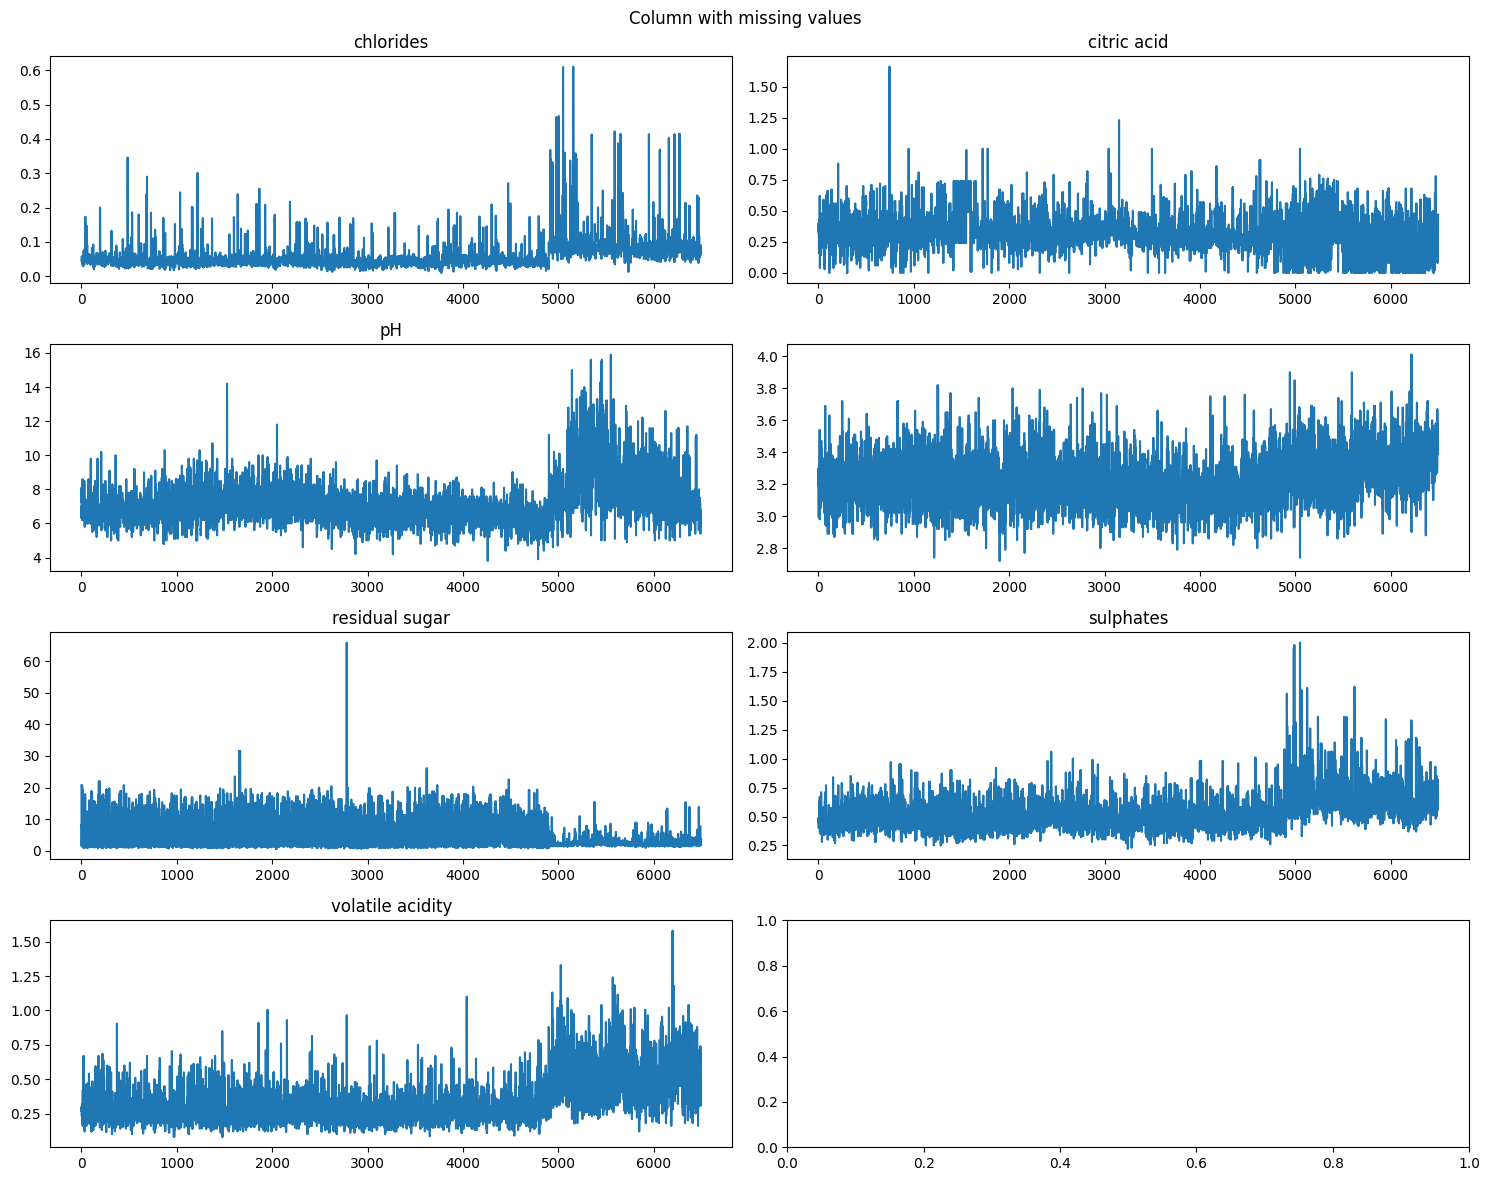

In [155]:
fig, axes = plt.subplots(4,2, figsize=(15,12))
fig.suptitle('Column with missing values')

axes[0,0].plot(data['chlorides'])
axes[0,0].set_title('chlorides')
axes[0,1].plot(data['citric acid'])
axes[0,1].set_title('citric acid')
axes[1,0].plot(data['fixed acidity'])
axes[1,0].set_title('fixed acidity')
axes[1,1].plot(data['pH'])
axes[1,0].set_title('pH')
axes[2,0].plot(data['residual sugar'])
axes[2,0].set_title('residual sugar')
axes[2,1].plot(data['sulphates'])
axes[2,1].set_title('sulphates')
axes[3,0].plot(data['volatile acidity'])
axes[3,0].set_title('volatile acidity')

fig.tight_layout()
plt.show()

    

(0.0, 0.6)

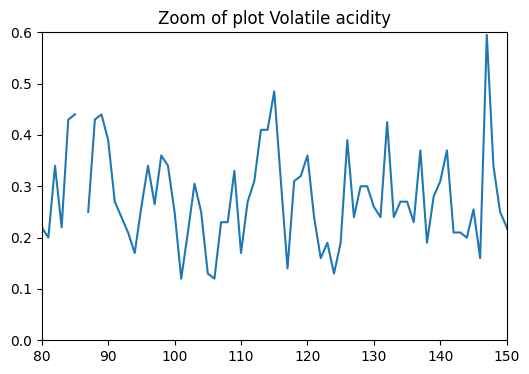

In [156]:
plt.figure(figsize=(6,4))
plt.title('Zoom of plot Volatile acidity')
plt.plot(data['volatile acidity'])
plt.xlim(80,150)
plt.ylim(0,0.6)

In [157]:
data_interp = data.interpolate(method='cubic')


In [158]:
print('Shape: {}'.format(data_interp.shape))

Shape: (6497, 13)


In [159]:
missing_val(data_interp)


 -------------------------

 Columns sorted:
-------------------------


[]

(0.0, 0.6)

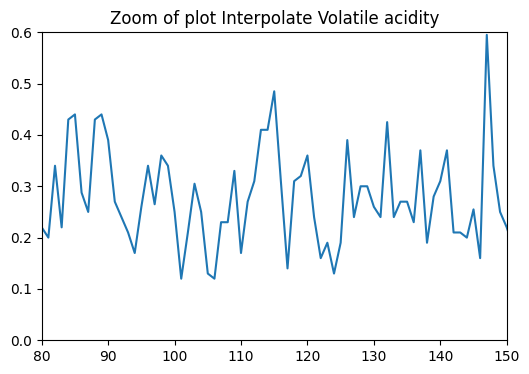

In [160]:
plt.figure(figsize=(6,4))
plt.title('Zoom of plot Interpolate Volatile acidity')
plt.plot(data_interp['volatile acidity'])
plt.xlim(80,150)
plt.ylim(0,0.6)

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>]], dtype=object)

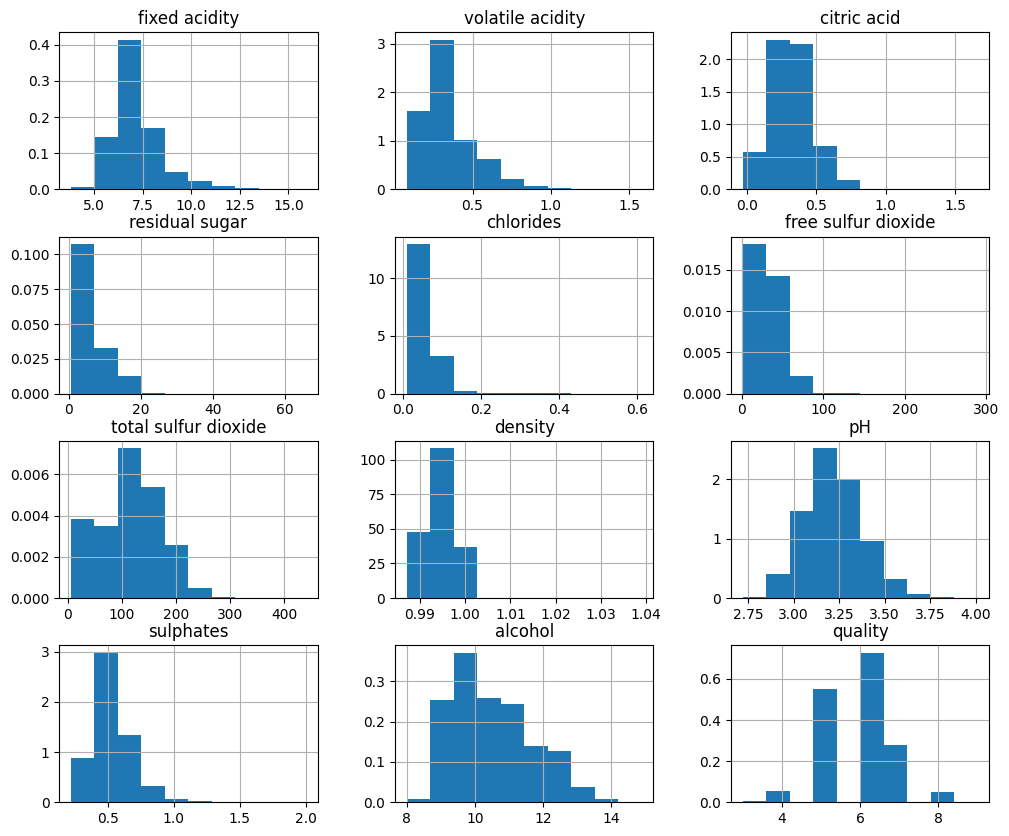

In [161]:
data_interp.hist(figsize=(12,10), density=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


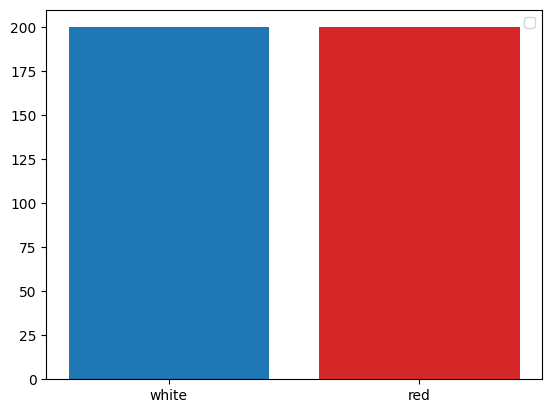

In [162]:
bar_color = ['tab:red', 'tab:blue']
plt.bar(data_interp['type'], height=200, color=bar_color)

plt.legend()

In [163]:
train = data_interp.drop('type', axis=1).values
target = data_interp['type']

In [164]:
x_train

array([[0.23140496, 0.51666667, 0.02910155, ..., 0.21348315, 0.43478261,
        0.5       ],
       [0.6446281 , 0.24      , 0.39614852, ..., 0.25280899, 0.31884058,
        0.5       ],
       [0.24793388, 0.12      , 0.27774627, ..., 0.16292135, 0.20289855,
        0.33333333],
       ...,
       [0.26446281, 0.25333333, 0.24814571, ..., 0.07303371, 0.60869565,
        0.66666667],
       [0.16528926, 0.30666667, 0.01726132, ..., 0.07303371, 0.63768116,
        0.33333333],
       [0.20661157, 0.16      , 0.20670492, ..., 0.13483146, 0.62318841,
        0.5       ]])

In [165]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

target = le.fit_transform(target)

In [166]:
target

array([1, 1, 1, ..., 0, 0, 0])

In [167]:
from sklearn.model_selection import train_test_split

seed = 123

In [168]:
x_train, x_test, y_train, y_test = train_test_split(
    train, target, test_size=0.2, random_state = seed)

In [169]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)

In [170]:
print('Type: {} | Shape: {}'.format(type(x_train), x_train.shape))
x_train


Type: <class 'numpy.ndarray'> | Shape: (5197, 12)


array([[0.23140496, 0.51666667, 0.02910155, ..., 0.21348315, 0.43478261,
        0.5       ],
       [0.6446281 , 0.24      , 0.39614852, ..., 0.25280899, 0.31884058,
        0.5       ],
       [0.24793388, 0.12      , 0.27774627, ..., 0.16292135, 0.20289855,
        0.33333333],
       ...,
       [0.26446281, 0.25333333, 0.24814571, ..., 0.07303371, 0.60869565,
        0.66666667],
       [0.16528926, 0.30666667, 0.01726132, ..., 0.07303371, 0.63768116,
        0.33333333],
       [0.20661157, 0.16      , 0.20670492, ..., 0.13483146, 0.62318841,
        0.5       ]])

# 4.Build our model

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [172]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
pred_rfc = rfc.predict(x_test)
acc_rfc = accuracy_score(y_test, pred_rfc)

print('Score of RandomForestClassifier {}'.format(acc_rfc))

Score of RandomForestClassifier 0.9738461538461538


In [193]:
for kernel in ("linear", "rbf", "poly"):
    svm_model = svm.SVC(kernel = kernel, gamma = 10)
    svm_model.fit(x_train, y_train)
    svm_pred = svm_model.predict(x_test)
    list_acc_svm = []
    acc_svm = accuracy_score(y_test, svm_pred)
    print('SVM model with {} kernel: {}'.format(kernel, acc_svm))
    list_acc_svm.append(acc_svm)


    plt.figure()
    plt.clf()
    
    plt.scatter(train[:,0], train[:,1], c=target, zorder = 10, cmap = plt.cm.Paired, edgecolor='k', s = 20)
    plt.scatter(x_test[:,0], x_test[:,1], s = 80, facecolors = "none", edgecolor = 'k')

    plt.axis('tight')
    
    x_min = train[:,0].min()
    x_max = train[:,0].max()
    y_min = train[:,1].min()
    y_max = train[:,1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.pcolormesh(XX, YY, Z > 0, cmap = plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors = ['k', 'k', 'k'],
        linestyles = ['--', '-', '--'],
        levels = [-0.5,0,0.5],
    )

    plt.title(kernel)
plt.show()





SVM model with linear kernel: 0.9738461538461538
SVM model with rbf kernel: 0.9223076923076923
SVM model with poly kernel: 0.4676923076923077


In [ ]:
clf = XGBClassifier()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)
acc_clf = accuracy_score(y_test, pred_clf)

print('Score of XGBClassifier {}'.format(acc_clf))

Score of XGBClassifier 0.97
